In [14]:
import pandas as pd  # 판다스
import numpy as np   # 넘파이
import matplotlib.pyplot as plt  # 맷플롭립
import matplotlib
import matplotlib.ticker as ticker
from matplotlib import font_manager,rc

In [15]:
file_path = 'C:/Users/USER/Documents/dataModel/A회사_보습제_매출데이터_v1.csv'

In [16]:
df = pd.read_csv(file_path,encoding='utf-8')
df

,9월,10월,11월,12월,1월,2월
총매출,"$5,280,000","$5,501,000","$5,469,000","$5,480,000","$5,533,000","$5,554,000"
목표매출,"$5,280,000","$5,500,000","$5,729,000","$5,968,000","$6,217,000","$6,476,000"
광고비용,"$1,056,000","$950,400","$739,200","$528,000","$316,800","$316,800"
소셜네트워크비용,$0,"$105,600","$316,800","$528,000","$739,200","$739,200"
1온스별단가,$2.0,$2.0,$2.0,$1.9,$1.9,$1.9


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 총매출 to 1온스별단가
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   9월      5 non-null      object
 1   10월     5 non-null      object
 2   11월     5 non-null      object
 3   12월     5 non-null      object
 4   1월      5 non-null      object
 5   2월      5 non-null      object
dtypes: object(6)
memory usage: 280.0+ bytes


In [18]:
df.describe()

,9월,10월,11월,12월,1월,2월
count,5,5,5,5,5,5
unique,4,5,5,4,5,5
top,"$5,280,000","$5,501,000","$5,469,000","$528,000","$5,533,000","$5,554,000"
freq,2,1,1,2,1,1


In [19]:
df.index

Index(['총매출', '목표매출', '광고비용', '소셜네트워크비용', '1온스별단가'], dtype='object')

In [20]:
df.columns

Index(['9월', '10월', '11월', '12월', '1월', '2월'], dtype='object')

In [21]:
font_path = "C:/Windows/Fonts/H2GTRM.TTF"
#폰트 이름 얻어오기
font_name = font_manager.FontProperties(fname=font_path).get_name()

In [22]:
#font 설정
matplotlib.rc('font',family=font_name)

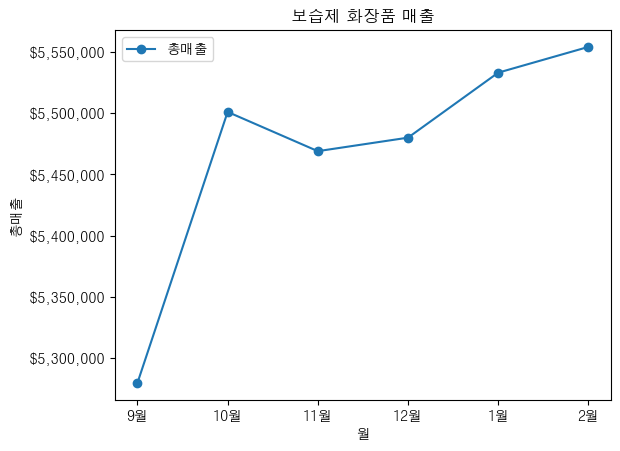

In [23]:
# '총매출' 열을 숫자로 변환
df.loc['총매출'] = pd.to_numeric(df.loc['총매출'].replace('[\$,]', '', regex=True))
plt.plot(df.columns, df.loc['총매출'],marker='o',linestyle='-', label='총매출')
plt.title("보습제 화장품 매출")  # title 설정
plt.xlabel('월')  # x축 레이블 설정
plt.ylabel('총매출')  # y축 레이블 설정
plt.legend()
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))
plt.show()  # 그래프 표시

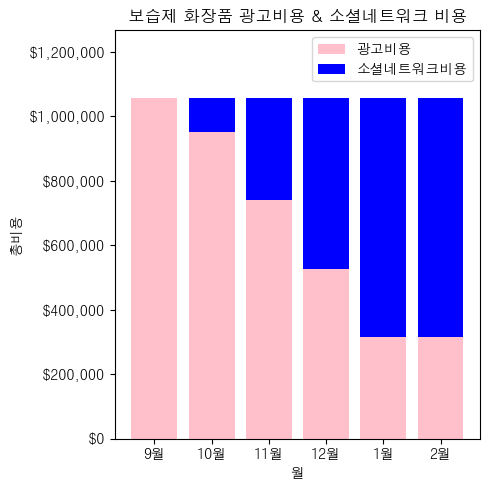

In [47]:
df.loc['광고비용'] = pd.to_numeric(df.loc['광고비용'].replace('[\$,]', '', regex=True))
df.loc['소셜네트워크비용'] = pd.to_numeric(df.loc['소셜네트워크비용'].replace('[\$,]', '', regex=True))
plt.figure(figsize = (5, 5))
plt.bar(df.columns, df.loc['광고비용'], color=['pink'], label='광고비용')

plt.bar(df.columns, df.loc['소셜네트워크비용'], bottom=df.loc['광고비용'], color=['blue'], label='소셜네트워크비용')
plt.title('보습제 화장품 광고비용 & 소셜네트워크 비용')
plt.xlabel('월')
plt.ylabel('총비용')
plt.legend()
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))
plt.ylim(0, max(df.loc['광고비용'] + df.loc['소셜네트워크비용']) * 1.2)
plt.tight_layout()
plt.show()

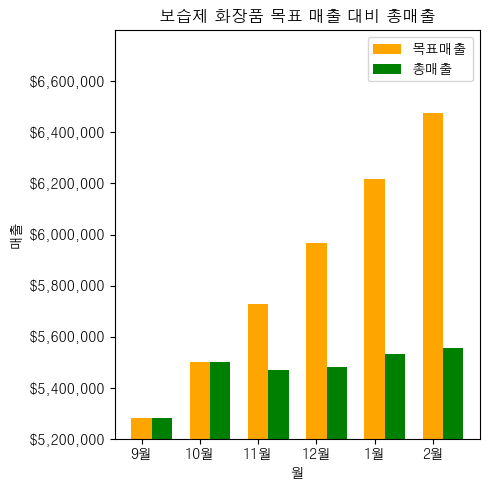

In [62]:
df.loc['목표매출'] = pd.to_numeric(df.loc['목표매출'].replace('[\$,]', '', regex=True))
df.loc['총매출'] = pd.to_numeric(df.loc['총매출'].replace('[\$,]', '', regex=True))
plt.figure(figsize = (5, 5))
# 각각의 막대 그래프의 너비를 조절
bar_width = 0.35

plt.bar(np.arange(len(df.columns)), df.loc['목표매출'], width=bar_width, color=['orange'], label='목표매출', align='edge')

plt.bar(np.arange(len(df.columns)) + bar_width, df.loc['총매출'], width=bar_width, color=['green'], label='총매출', align='edge')

plt.title('보습제 화장품 목표 매출 대비 총매출')
plt.xlabel('월')
plt.ylabel('매출')
plt.xticks(np.arange(len(df.columns)) + bar_width / 2, df.columns)
plt.legend()
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))
# y 축 범위 설정
plt.ylim(5200000, plt.ylim()[1])

plt.tight_layout()

plt.show()

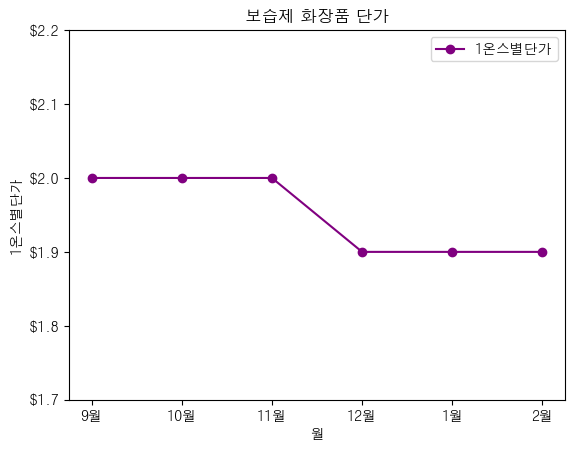

In [81]:
df.loc['1온스별단가'] = pd.to_numeric(df.loc['1온스별단가'].replace('[\$.]', '', regex=True))
plt.plot(df.columns, df.loc['1온스별단가'],marker='o',linestyle='-', color='purple', label='1온스별단가')
plt.title("보습제 화장품 단가")  # title 설정
plt.xlabel('월')  # x축 레이블 설정
plt.ylabel('1온스별단가')  # y축 레이블 설정
plt.legend()
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.1f}'))
plt.ylim(1.7, 2.2)
plt.show()  # 그래프 표시